In [219]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [73]:
def get_data(ep, num_qubits, num_meas, method, noise="None"):
    basen=str(ep)+"_num_qubits"+str(num_qubits)+"_num_meas"+str(num_meas)+"_degree"+str(num_meas)+"_"
    basen+="num_reservoirs20_timeplex10_method"+str(method)+"_noise"+str(noise)+".pickle"
    name="X_train"+basen
    with open(name,"rb") as f:
        X_train = pickle.load(f)
    
    name="X_test"+basen
    with open(name,"rb") as f:
        X_test = pickle.load(f)
    
    name="score"+basen
    with open(name,"rb") as f:
        score = pickle.load(f)
        
    name="prediction"+basen
    with open(name,"rb") as f:
        prediction = pickle.load(f)
        
    name="state"+basen
    with open(name,"rb") as f:
        state = pickle.load(f)
    return X_train, X_test, score, prediction, state, basen

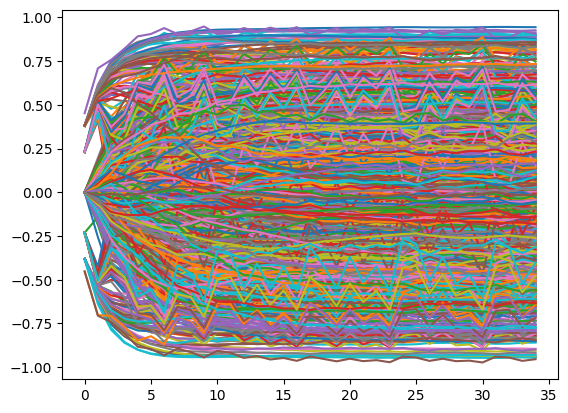

In [256]:
X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "classical", "None")
_=plt.plot(state)

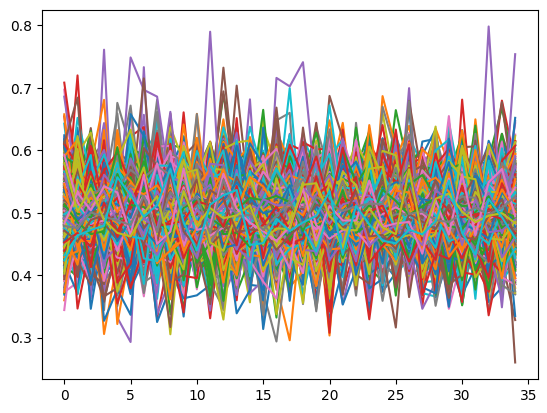

In [257]:
X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
_=plt.plot(state)

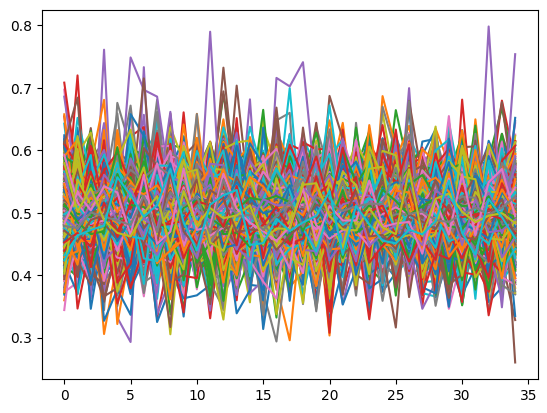

In [254]:
X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
_=plt.plot(state)

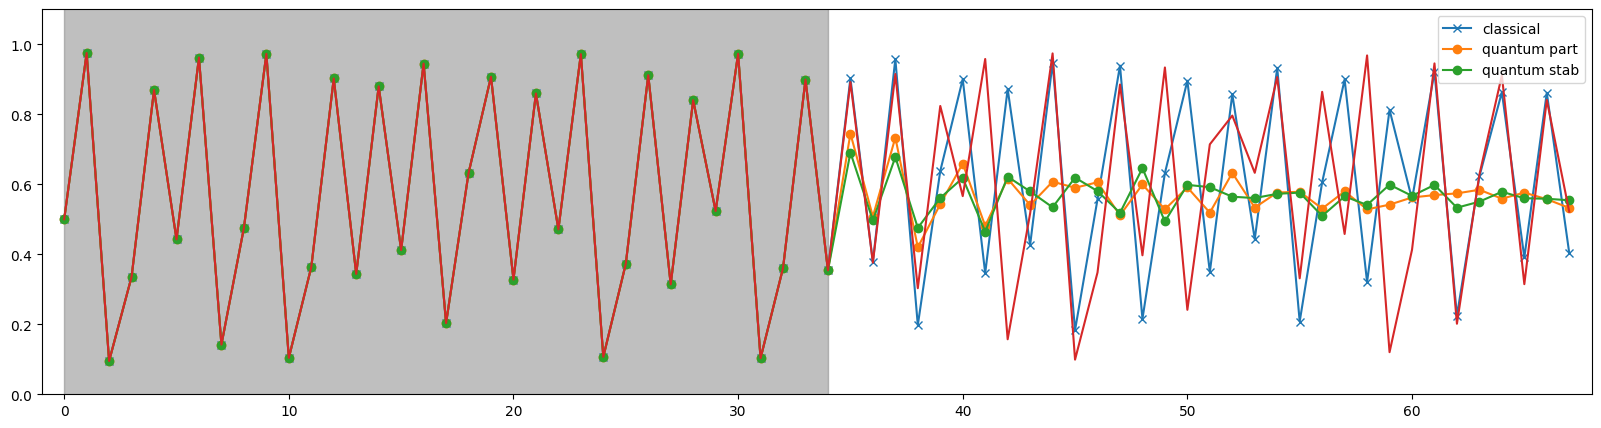

In [253]:
fig=plt.figure(figsize=(20,5))

ep=0

X_train, X_test, score, prediction, statec, basen = get_data(ep, 7, 6, "classical", "None")
plt.plot(prediction, 'x-', label="classical")

X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_part", "True")
plt.plot(prediction, 'o-', label="quantum part")

X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
plt.plot(prediction, 'o-', label="quantum stab")

# plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
plt.plot(np.concatenate([X_train,X_test]))
plt.legend()
plt.ylim([-0,1.1])
plt.xlim([-1,len(prediction)])
plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)

# plt.show()
fig=tikzplotlib_fix_ncols(fig)
tikzplotlib.save("comparison1_"+basen+".tex")

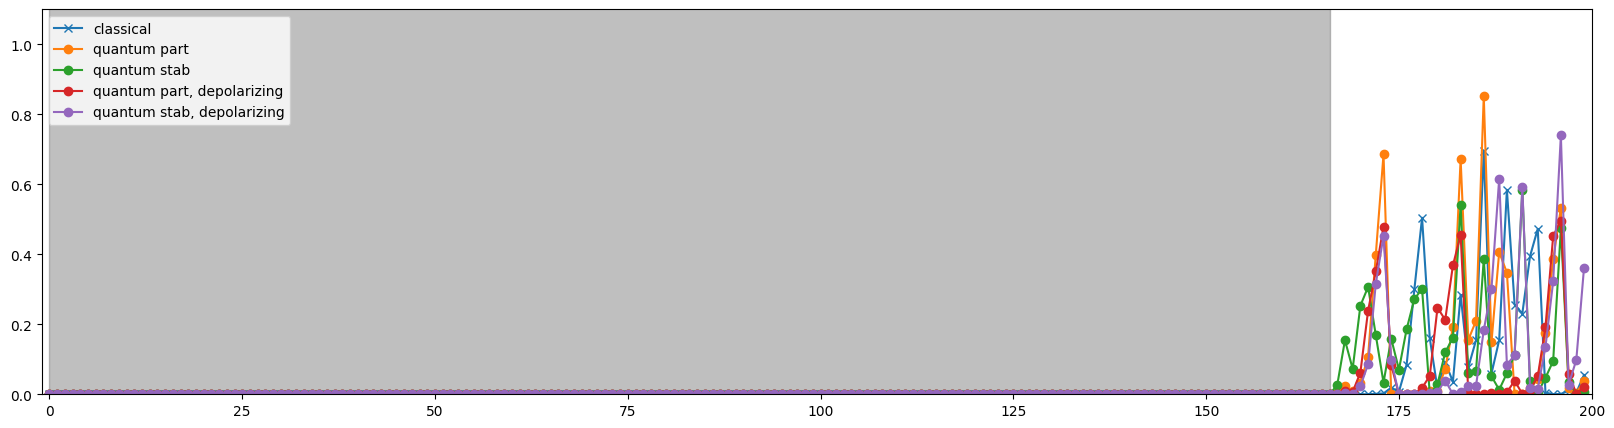

In [218]:
fig=plt.figure(figsize=(20,5))

ep=4

X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "classical", "None")
gt=np.concatenate([X_train,X_test])
plt.plot((prediction-gt)**2, 'x-', label="classical")

X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
plt.plot((prediction-gt)**2, 'o-', label="quantum part")

X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "None")
plt.plot((prediction-gt)**2, 'o-', label="quantum stab")

X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
plt.plot((prediction-gt)**2, 'o-', label="quantum part, depolarizing")

X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
plt.plot((prediction-gt)**2, 'o-', label="quantum stab, depolarizing")

# plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
plt.plot()
plt.legend()
plt.ylim([-0,1.1])
plt.xlim([-1,len(prediction)])
plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)

# plt.show()
fig=tikzplotlib_fix_ncols(fig)
tikzplotlib.save("comparison2_"+basen+".tex")

In [244]:
from reservoirpy.datasets import logistic_map
ts=logistic_map(10000, r=3.9, x0=0.5).flatten()

FileNotFoundError: [Errno 2] No such file or directory: 'prediction2_num_qubits7_num_meas4_degree4_num_reservoirs20_timeplex10_methodquantum_stab_noiseTrue.pickle'

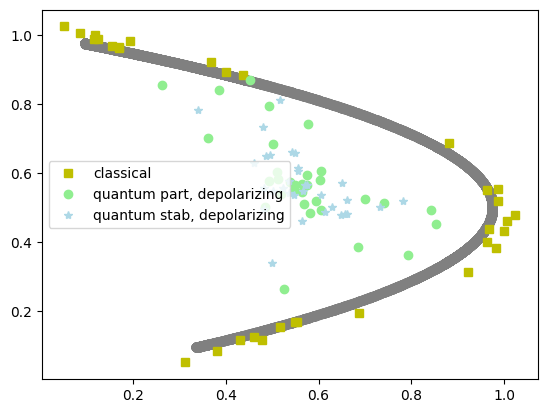

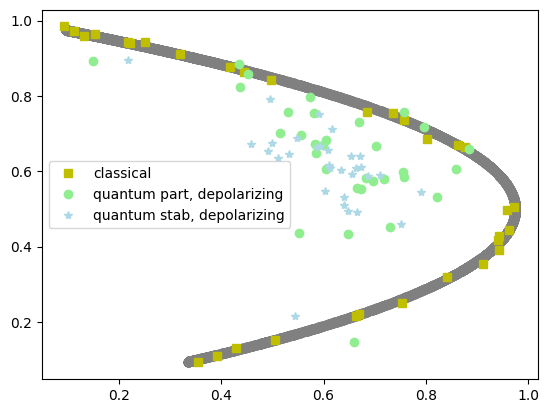

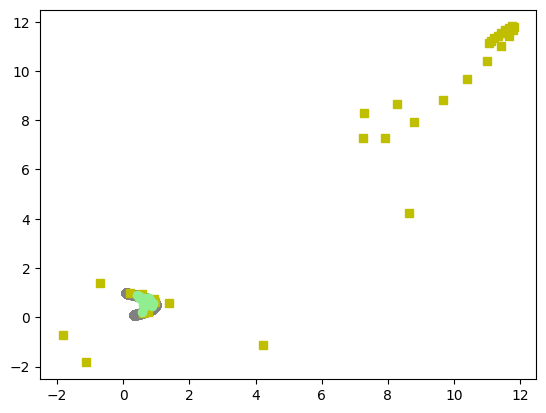

In [262]:
k=1

for ep in range(5):
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "classical", "None")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'ys', label="classical")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_part", "None")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='darkgreen', label="quantum part")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_stab", "None")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="darkblue", label="quantum stab", alpha=.5)
    
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("comparison3_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')